This notebook it's been created to select the best classifier to predict what combinations will cause a death due to COVID-19.

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("200813COVID19MEXICO.csv")
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DEFUNCION
0,13/08/2020,1a9279,2,4,31,1,31,31,50,1,...,2,2,2,99,1,99,MÃ©xico,99,97,2
1,13/08/2020,1b6543,2,4,9,2,20,15,39,1,...,2,2,2,99,1,99,MÃ©xico,99,97,2
2,13/08/2020,140505,2,4,21,2,5,21,114,2,...,2,2,2,99,1,99,MÃ©xico,99,2,2
3,13/08/2020,16cf83,2,3,15,2,15,15,106,2,...,2,2,2,2,1,99,MÃ©xico,99,2,2
4,13/08/2020,01e504,2,4,15,1,9,15,60,1,...,2,2,1,99,1,99,MÃ©xico,99,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,13/08/2020,0a4c1d,1,4,5,1,5,5,18,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2
1048571,13/08/2020,10ae52,1,12,9,1,11,11,30,1,...,1,2,2,1,2,99,MÃ©xico,99,97,2
1048572,13/08/2020,0260bb,1,4,5,2,5,5,35,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2
1048573,13/08/2020,038d6e,2,11,3,1,3,3,2,2,...,2,2,2,2,2,99,MÃ©xico,99,2,2


In [3]:
#Since it is a very large dataset, we pick a sample of 10%

df = df.sample(frac=0.1, replace=True, random_state=1)
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DEFUNCION
128037,13/08/2020,165222,1,12,7,1,7,7,101,1,...,2,2,2,2,1,99,MÃ©xico,99,97,2
491755,13/08/2020,06afce,1,12,19,2,19,19,6,1,...,2,2,2,2,2,99,MÃ©xico,99,97,2
470924,13/08/2020,0179aa,1,12,19,1,19,19,14,1,...,2,2,2,2,2,99,MÃ©xico,99,97,2
791624,13/08/2020,1cc8d0,1,12,5,1,5,5,30,2,...,2,2,2,2,1,99,MÃ©xico,99,2,2
491263,13/08/2020,186598,2,12,19,1,19,19,26,1,...,2,2,2,1,2,99,MÃ©xico,99,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435271,13/08/2020,06f5d2,2,12,9,1,9,9,5,1,...,2,2,2,1,2,99,MÃ©xico,99,97,2
976639,13/08/2020,0940d3,2,12,9,2,15,9,11,1,...,2,2,2,1,2,99,MÃ©xico,99,97,2
87088,13/08/2020,15fe74,1,4,13,2,13,13,48,1,...,2,2,2,99,1,99,MÃ©xico,99,97,2
415429,13/08/2020,08e1c9,2,12,1,2,1,1,9,1,...,1,2,1,1,2,99,MÃ©xico,99,97,2


In [4]:
#We make a previous check to see what are the most correlated values in the dataset.

c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print (so[0:10])

DIABETES       MIGRANTE         0.000051
MIGRANTE       DIABETES         0.000051
RENAL_CRONICA  RESULTADO        0.000089
RESULTADO      RENAL_CRONICA    0.000089
NEUMONIA       DIABETES         0.000118
DIABETES       NEUMONIA         0.000118
HIPERTENSION   MIGRANTE         0.000347
MIGRANTE       HIPERTENSION     0.000347
DIABETES       DEFUNCION        0.000418
DEFUNCION      DIABETES         0.000418
dtype: float64


In [5]:
#We drop the categoric values that do not represent significant information for our model

df1 = df.drop(["FECHA_INGRESO", "FECHA_SINTOMAS", "FECHA_DEF", "PAIS_NACIONALIDAD", "PAIS_ORIGEN" ], axis = 1)
df1

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI,DEFUNCION
128037,13/08/2020,165222,1,12,7,1,7,7,101,1,...,2,2,2,2,2,2,1,99,97,2
491755,13/08/2020,06afce,1,12,19,2,19,19,6,1,...,2,2,2,2,2,2,2,99,97,2
470924,13/08/2020,0179aa,1,12,19,1,19,19,14,1,...,2,2,2,2,2,2,2,99,97,2
791624,13/08/2020,1cc8d0,1,12,5,1,5,5,30,2,...,2,1,2,2,2,2,1,99,2,2
491263,13/08/2020,186598,2,12,19,1,19,19,26,1,...,2,2,2,2,2,1,2,99,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435271,13/08/2020,06f5d2,2,12,9,1,9,9,5,1,...,2,2,2,2,2,1,2,99,97,2
976639,13/08/2020,0940d3,2,12,9,2,15,9,11,1,...,2,2,2,2,2,1,2,99,97,2
87088,13/08/2020,15fe74,1,4,13,2,13,13,48,1,...,2,2,2,2,2,99,1,99,97,2
415429,13/08/2020,08e1c9,2,12,1,2,1,1,9,1,...,2,2,1,2,1,1,2,99,97,2


In [6]:
#We check the type of data we will be working with

df1.dtypes

FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
SEXO                    int64
ENTIDAD_NAC             int64
ENTIDAD_RES             int64
MUNICIPIO_RES           int64
TIPO_PACIENTE           int64
INTUBADO                int64
NEUMONIA                int64
EDAD                    int64
NACIONALIDAD            int64
EMBARAZO                int64
HABLA_LENGUA_INDIG      int64
DIABETES                int64
EPOC                    int64
ASMA                    int64
INMUSUPR                int64
HIPERTENSION            int64
OTRA_COM                int64
CARDIOVASCULAR          int64
OBESIDAD                int64
RENAL_CRONICA           int64
TABAQUISMO              int64
OTRO_CASO               int64
RESULTADO               int64
MIGRANTE                int64
UCI                     int64
DEFUNCION               int64
dtype: object

In [7]:
#We create a summary regarding the significance of the features and the characteristics of our dataset.

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = df1.iloc[:,2:30].values
y = df1.iloc[:,30].values

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1495.
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:21:42   Log-Likelihood:                 15027.
No. Observations:              104858   AIC:                        -3.000e+04
Df Residuals:                  104829   BIC:                        -2.972e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4014      0.115     20.818      0.000       2.175       2.627
x

In [8]:
#We pick only the values with P-values above .5 to create our training and test sets.

X = df1[["EMBARAZO","OTRA_COM", "OBESIDAD", "TABAQUISMO"]]

In [9]:
#We create a correlation matrix of the chosen features.

merge = pd.concat([X, df1['DEFUNCION']], axis=1, sort=False)
merge.head()
merge.corr(method='pearson')

,EMBARAZO,OTRA_COM,OBESIDAD,TABAQUISMO,DEFUNCION
EMBARAZO,1.000000,0.015848,0.016637,0.012138,-0.072465
OTRA_COM,0.015848,1.000000,0.685832,0.710273,-0.019045
OBESIDAD,0.016637,0.685832,1.000000,0.826598,-0.008487
TABAQUISMO,0.012138,0.710273,0.826598,1.000000,-0.014676
DEFUNCION,-0.072465,-0.019045,-0.008487,-0.014676,1.000000


In [10]:
#We divide our data into training an test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("X_train size is ", X_train.shape, "\n", "X_test size is ", X_test.shape, "\n",
      "y_train size is ", y_train.shape, "\n", "y_test size is ", y_test.shape)
print(X_train[0:5])
y_train[0:5]

X_train size is  (83886, 4) 
 X_test size is  (20972, 4) 
 y_train size is  (83886,) 
 y_test size is  (20972,)
        EMBARAZO  OTRA_COM  OBESIDAD  TABAQUISMO
806309         2         2         2           2
944766        97         2         2           2
247295        97         2         2           2
99928         97         2         2           2
220911         2         2         2           2


array([2, 2, 2, 2, 2], dtype=int64)

In [11]:
#Standarize the data of our features.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.00093315, -0.06407305, -0.02406463, -0.04154966],
       [ 0.99862036, -0.06407305, -0.02406463, -0.04154966],
       [-1.00093315, -0.06407305, -0.02406463, -0.04154966],
       [-1.00093315, -0.06407305, -0.02406463, -0.04154966],
       [-1.00093315, -0.06407305, -0.02406463, -0.04154966]])

In [12]:
# also need to normalize the test and train dataset
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train[0:5]
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

X_test[0:5]

array([[-1.0026625 , -0.06560802, -0.02685304, -0.0397188 ],
       [ 0.99690769, -0.06560802, -0.02685304, -0.22669581],
       [-1.0026625 , -0.06560802, -0.02685304, -0.0397188 ],
       [ 0.99690769, -0.06560802, -0.02685304, -0.0397188 ],
       [ 0.99690769, -0.06560802, -0.02685304, -0.0397188 ]])

Test set Accuracy at k= 1 :  [0.04084814 0.55158171]
Test set Accuracy at k= 2 :  [0.04109305 0.54974484]
Test set Accuracy at k= 3 :  [0.         0.93324433]
Test set Accuracy at k= 4 :  [0.002849   0.93323159]
Test set Accuracy at k= 5 :  [0.         0.93324433]
Test set Accuracy at k= 6 :  [0.00213675 0.93318709]
Test set Accuracy at k= 7 :  [0.0021398  0.93328246]
Test set Accuracy at k= 8 :  [0.00213828 0.93323478]
Test set Accuracy at k= 9 :  [0.         0.93319664]


Text(0, 0.5, 'Testing Accuracy')

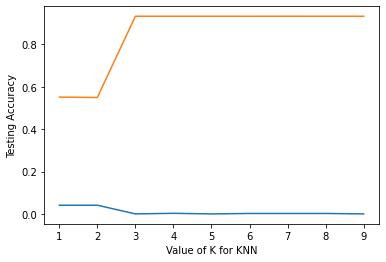

In [13]:
# finding a suitable k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_score(y_test, knn_yhat, average=None))
    accuracy_score.append(jaccard_score(y_test, knn_yhat, average=None))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [15]:
# for KNN
from sklearn.neighbors import KNeighborsClassifier
# perform the test
KNN = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
KNN

KNeighborsClassifier(n_neighbors=2)

In [16]:
# findinng the best depth level
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# Compare accuracy result for depth = 3, 4 and 5
d_range = range(3, 6)
f1 = []
ja = []
for d in d_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(X_train, y_train)
    dt_yhat = DT.predict(X_test)
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_score(y_test, dt_yhat, average = "weighted"))

result = pd.DataFrame(f1, index=['d=3','d=4', 'd=5'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=ja)
result.columns.name = "Depth"
result

Depth,F1-score,Jacard
d=3,0.900995,0.870900
d=4,0.900995,0.870900
d=5,0.900971,0.870856


In [17]:
# for Decision Trees
from sklearn.tree import DecisionTreeClassifier
# prepare DT setting
DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# perform the test
clft= DT.fit(X_train, y_train)
clft

DecisionTreeClassifier(criterion='entropy', max_depth=3)

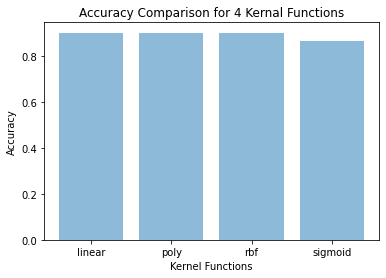

In [18]:
# for SVM
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

func_list = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_score = []

for func in func_list:
    SVM = svm.SVC(kernel=func)
    SVM.fit(X_train, y_train)
    svm_yhat = SVM.predict(X_test)
    accuracy_score.append(f1_score(y_test, svm_yhat, average='weighted'))
    
# plot the comparison among 4 kernel functions
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(func_list))
plt.bar(y_pos, accuracy_score, align='center', alpha=0.5)
plt.xticks(y_pos, func_list)
plt.ylabel('Accuracy')
plt.xlabel('Kernel Functions')
plt.title('Accuracy Comparison for 4 Kernal Functions')
plt.show()

In [19]:
# for SVM
from sklearn import svm
# prepare SVM setting
SVM = svm.SVC(kernel='linear')
# perform the test
SVM.fit(X_train, y_train)
SVM

SVC(kernel='linear')

Test  0 : Accuracy at c = 0.1 solver= newton-cg is :  0.24279866984638115
Test  1 : Accuracy at c = 0.1 solver= lbfgs is :  0.24279867773556052
Test  2 : Accuracy at c = 0.1 solver= liblinear is :  0.2427914281316176
Test  3 : Accuracy at c = 0.1 solver= sag is :  0.24279865952499274
Test  4 : Accuracy at c = 0.1 solver= saga is :  0.24279867935911909
Test  5 : Accuracy at c = 0.01 solver= newton-cg is :  0.24278294046895252
Test  6 : Accuracy at c = 0.01 solver= lbfgs is :  0.24278294672144735
Test  7 : Accuracy at c = 0.01 solver= liblinear is :  0.24279450209439132
Test  8 : Accuracy at c = 0.01 solver= sag is :  0.24278295246171044
Test  9 : Accuracy at c = 0.01 solver= saga is :  0.24278293750449026
Test  10 : Accuracy at c = 0.001 solver= newton-cg is :  0.24274933060187026
Test  11 : Accuracy at c = 0.001 solver= lbfgs is :  0.24274928183839745
Test  12 : Accuracy at c = 0.001 solver= liblinear is :  0.24744862650561875
Test  13 : Accuracy at c = 0.001 solver= sag is :  0.242749

Text(0, 0.5, 'Testing Accuracy')

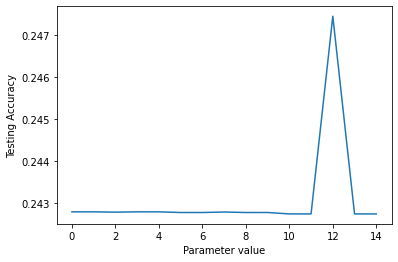

In [21]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
%matplotlib inline

c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []

accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
        # perform the test
        LR = LogisticRegression(C=c, solver=sol).fit(X_train, y_train)
        # it can predict the outcome
        lr_yhat = LR.predict(X_test)
        lr_prob = LR.predict_proba(X_test)
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, lr_prob))
        accuracy_score.append(log_loss(y_test, lr_prob))
lr_prob = LR.predict_proba(X_test)
log_loss(y_test, lr_prob)
# plot the relationship between K and testing accuracy
plt.plot(idx, accuracy_score)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')

In [22]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
# prepare LR setting
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.001, solver='liblinear')

In [23]:
# Jaccard setup
from sklearn.metrics import jaccard_score

# evaluate KNN
knn_yhat = KNN.predict(X_test)
jc1 = round(jaccard_score(y_test, knn_yhat, average = "weighted"), 2)
# evaluate Decision Trees
dt_yhat = DT.predict(X_test)
jc2 = round(jaccard_score(y_test, dt_yhat, average = "weighted"), 2)
#evaluate SVM
svm_yhat = SVM.predict(X_test)
jc3 = round(jaccard_score(y_test, svm_yhat, average = "weighted"), 2)
# evaluate Logistic Regression
lr_yhat = LR.predict(X_test)
jc4 = round(jaccard_score(y_test, lr_yhat, average = "weighted"), 2)

list_jc = [jc1, jc2, jc3, jc4]
list_jc

[0.52, 0.87, 0.87, 0.87]

In [24]:
# F1-score setup
from sklearn.metrics import f1_score

# evaluate KNN
fs1 = round(f1_score(y_test, knn_yhat, average='weighted'), 2)
# evaluate Desision Trees 
fs2 = round(f1_score(y_test, dt_yhat, average='weighted'), 2)
# evaluate SVM
fs3 = round(f1_score(y_test, svm_yhat, average='weighted'), 2)
# evaluate Logistic Regression
fs4 = round(f1_score(y_test, lr_yhat, average='weighted'),2 )

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.67, 0.9, 0.9, 0.9]

In [25]:
# LogLoss
from sklearn.metrics import log_loss
lr_prob = LR.predict_proba(X_test)
list_ll = ['NA', 'NA', 'NA', round(log_loss(y_test, lr_prob), 2)]
list_ll

['NA', 'NA', 'NA', 0.25]

In [ ]:
import pandas as pd

# fomulate the report format
df_r = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df_r.columns = ['Jaccard']
df_r.insert(loc=1, column='F1-score', value=list_fs)
df_r.insert(loc=2, column='LogLoss', value=list_ll)
df_r.columns.name = 'Algorithm'
df_r

Additional evaluation methods for selected model

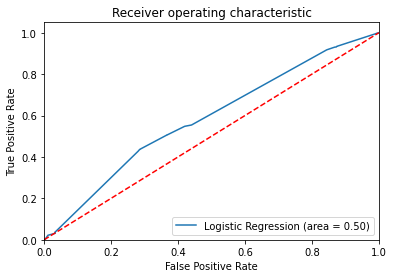

In [57]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1], pos_label=2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [50]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, lr_yhat)
print(confusion_matrix)

[[    0  1400]
 [    0 19572]]


In [54]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, lr_yhat))

precision    recall  f1-score   support

           1       0.00      0.00      0.00      1400
           2       0.93      1.00      0.97     19572

    accuracy                           0.93     20972
   macro avg       0.47      0.50      0.48     20972
weighted avg       0.87      0.93      0.90     20972



In [65]:
df.to_csv('CovidI.csv')